In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import infeasible_newton

### A4.19-b

In [2]:
# data for vehicle speed scheduling problem.
# contains quantities: n, a, b, c, d, smin, smax, tau_min, tau_max

n =   100
a =     1
b =     6
c =    10
d = np.array(
    [1.9501, 1.2311, 1.6068, 1.4860, 1.8913, 1.7621, 1.4565, 1.0185, 1.8214, 1.4447, 
     1.6154, 1.7919, 1.9218, 1.7382, 1.1763, 1.4057, 1.9355, 1.9169, 1.4103, 1.8936, 
     1.0579, 1.3529, 1.8132, 1.0099, 1.1389, 1.2028, 1.1987, 1.6038, 1.2722, 1.1988, 
     1.0153, 1.7468, 1.4451, 1.9318, 1.4660, 1.4186, 1.8462, 1.5252, 1.2026, 1.6721,
     1.8381, 1.0196, 1.6813, 1.3795, 1.8318, 1.5028, 1.7095, 1.4289, 1.3046, 1.1897, 
     1.1934, 1.6822, 1.3028, 1.5417, 1.1509, 1.6979, 1.3784, 1.8600, 1.8537, 1.5936, 
     1.4966, 1.8998, 1.8216, 1.6449, 1.8180, 1.6602, 1.3420, 1.2897, 1.3412, 1.5341, 
     1.7271, 1.3093, 1.8385, 1.5681, 1.3704, 1.7027, 1.5466, 1.4449, 1.6946, 1.6213, 
     1.7948, 1.9568, 1.5226, 1.8801, 1.1730, 1.9797, 1.2714, 1.2523, 1.8757, 1.7373, 
     1.1365, 1.0118, 1.8939, 1.1991, 1.2987, 1.6614, 1.2844, 1.4692, 1.0648, 1.9883])
smin = np.array(
    [0.7828, 0.6235, 0.7155, 0.5340, 0.6329, 0.4259, 0.7798, 0.9604, 0.7298, 0.8405, 0.4091, 
     0.5798, 0.9833, 0.8808, 0.6611, 0.7678, 0.9942, 0.2592, 0.8029, 0.2503, 0.6154, 0.5050,
     1.0744, 0.2150, 0.9680, 1.1708, 1.1901, 0.9889, 0.6387, 0.6983, 0.4140, 0.8435, 0.5200,
     1.1601, 0.9266, 0.6120, 0.9446, 0.4679, 0.6399, 1.1334, 0.8833, 0.4126, 1.0392, 0.8288,
     0.3338, 0.4071, 0.8072, 0.8299, 0.5705, 0.7751, 0.6514, 0.2439, 0.2272, 0.5127, 0.2129,
     0.5840, 0.8831, 0.2928, 0.2353, 0.8124, 0.8085, 0.2158, 0.2164, 0.3901, 0.7869, 0.2576,
     0.5676, 0.8315, 0.9176, 0.8927, 0.2841, 0.6544, 0.6418, 0.5533, 0.3536, 0.8756, 0.8992,
     0.9275, 0.6784, 0.7548, 0.3210, 0.6508, 0.9159, 1.0928, 0.4731, 0.4548, 1.0656, 0.4324,
     1.0049, 1.1084, 0.4319, 0.4393, 0.2498, 0.2784, 0.8408, 0.3909, 1.0439, 0.3739, 0.3708,
     1.1943])
smax = np.array(
    [1.9624, 1.6036, 1.6439, 1.5641, 1.7194, 1.9090, 1.3193, 1.3366, 1.9470, 2.8803, 2.5775, 
     1.4087, 1.6039, 2.9266, 1.4369, 2.3595, 3.2280, 1.8890, 2.8436, 0.5701, 1.1894, 2.4425, 
     2.2347, 2.2957, 2.7378, 2.8455, 2.1823, 1.6209, 1.2499, 1.3805, 1.5589, 2.8554, 1.8005, 
     3.0920, 2.1482, 1.8267, 2.1459, 1.5924, 2.7431, 1.4445, 1.7781, 0.8109, 2.7256, 2.4290, 
     2.5997, 1.8125, 1.9073, 1.5275, 2.1209, 2.5419, 1.7032, 0.5636, 1.3669, 2.3200, 2.1006, 
     2.7239, 2.8726, 1.3283, 1.7769, 2.5750, 1.4963, 2.3254, 1.6548, 1.9537, 1.5557, 1.6551, 
     2.7307, 1.8018, 2.5287, 1.9765, 1.8387, 2.3525, 1.7362, 1.6805, 1.9640, 2.8508, 1.9424, 
     2.0780, 2.1677, 2.1863, 2.0541, 1.9734, 2.7687, 2.3715, 1.1449, 2.1560, 3.3310, 2.3456, 
     2.7120, 2.3783, 0.9611, 2.0690, 1.2805, 0.8585, 2.2744, 2.3369, 2.6918, 2.6728, 2.5941, 
     1.6120])
tau_min = np.array(
    [1.0809, 2.7265, 3.5118, 5.3038, 5.4516, 7.1648, 9.2674, 12.1543, 14.4058, 16.6258,
     17.9214, 19.8242, 22.2333, 22.4849, 25.3213, 28.0691, 29.8751, 30.6358, 33.2561, 
     34.7963, 36.9943, 38.2610, 41.1451, 41.3613, 43.0215, 43.8974, 46.4713, 47.4786, 
     49.5192, 49.6795, 50.7495, 52.2444, 53.5477, 55.2351, 57.0850, 57.4250, 60.1198, 
     62.3834, 64.7568, 67.2016, 69.2116, 69.8143, 70.6335, 72.5122, 74.1228, 74.3013, 
     74.5682, 75.3821, 76.6093, 78.0315, 80.7584, 82.5472, 83.5340, 84.9686, 86.7601, 
     87.2445, 89.7329, 92.6013, 94.3879, 94.4742, 96.9105, 98.7409, 100.8453, 101.1219, 
     102.3966, 103.5233, 104.0218, 106.5212, 109.0372, 110.3920, 113.2618, 113.7033, 
     116.3131, 118.6214, 119.9539, 121.8157, 124.6708, 126.5908, 127.3328, 128.3909, 
     128.9545, 130.4264, 131.6542, 133.0448, 134.8776, 135.0912, 136.0340, 137.8591, 
     138.3842, 140.2473, 140.9852, 142.7472, 144.2654, 145.6597, 147.2840, 150.1110, 
     151.1363, 152.3417, 153.2647, 154.4994])
tau_max = np.array(
    [4.6528, 6.5147, 7.5178, 9.7478, 9.0641, 10.3891, 13.1540, 16.0878, 17.4352, 20.9539, 
     22.3695, 23.3875, 25.7569, 26.9019, 29.8890, 33.0415, 33.8218, 35.4414, 37.1583, 39.4054, 
     41.6520, 41.5935, 44.9329, 45.4028, 47.4577, 48.0358, 50.3929, 51.3692, 52.6947, 53.5665, 
     54.4821, 55.8495, 58.2514, 59.7541, 61.9845, 61.5409, 63.1482, 66.5758, 69.3892, 72.1558, 
     72.6555, 74.2216, 74.6777, 77.3780, 78.5495, 77.7574, 78.4675, 78.7265, 81.5470, 81.7429, 
     83.8565, 87.0579, 88.3237, 88.5409, 90.2625, 92.1100, 92.9949, 97.4829, 98.7916, 99.1695, 
     100.3291, 102.6510, 104.0075, 105.8242, 106.5207, 107.1619, 107.7716, 111.2568, 112.7815, 
     113.5394, 116.6615, 116.8022, 120.4465, 121.8652, 123.9981, 125.0498, 129.2106, 130.3409, 
     131.9796, 131.4842, 133.1503, 135.3247, 135.2318, 137.8225, 138.0808, 138.2218, 139.5026, 
     142.7253, 141.5105, 143.7757, 145.9842, 146.1712, 148.2622, 149.2407, 151.6295, 155.0270, 
     155.6694, 156.6739, 156.5266, 157.6903])

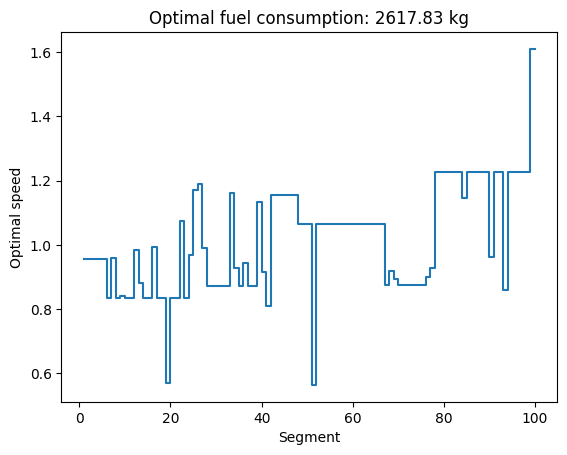

In [3]:

tmin = d/smax
tmax = d/smin

t = cp.Variable(n, nonneg=True)

constraints = [tmin <= t, t <= tmax]


for k in range(1, n+1):
    constraints.append(cp.sum(t[:k]) <= tau_max[k-1])
    constraints.append(cp.sum(t[:k]) >= tau_min[k-1])


objective = cp.Minimize(
    cp.sum(a * cp.multiply(d**2, cp.inv_pos(t)) + b * d + c * t)
)

prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.ECOS)

plt.step(range(1, n+1), d / t.value)
plt.xlabel("Segment")
plt.ylabel("Optimal speed")
plt.title(f"Optimal fuel consumption: {prob.value:.2f} kg")
plt.show()


### A4.41-c

In [4]:

def generate_positive_matrix(n):
    A = np.random.rand(n, n)
    return A.T @ A


In [5]:
def run_concave_convex_cp(x_0, P, n_iter):
    x = cp.Variable((n, 1))
    constraints = [cp.norm2(x) <= 1]
    x_k = x_0
    values = [(-x_k.T @ P @ x_k)[0, 0]]

    for _ in range(n_iter):
        objective = cp.Minimize(-x_k.T @ P @ (2*x - x_k))
        prob = cp.Problem(objective, constraints)
        prob.solve(solver=cp.ECOS)
        x_k = x.value
        values.append(prob.value)

    return values

In [6]:
n = 10
n_iter = 10
np.random.seed(42)  
P = generate_positive_matrix(n)

In [46]:
optimal_value = -np.max(np.linalg.eigh(P)[0])

In [47]:
optimal_value

np.float64(-23.005686788290998)

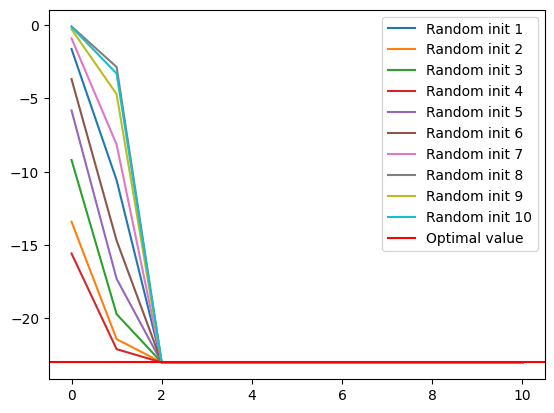

In [48]:



for k in range(10):
    x_0 = np.random.rand(n, 1)
    alpha = np.random.random()
    x_0 = alpha * x_0 / np.linalg.norm(x_0)
    plt.plot(range(n_iter + 1), run_concave_convex_cp(x_0, P, n_iter), label=f"Random init {k+1}")
plt.axhline(y=optimal_value, color='r', label="Optimal value")

plt.legend()
plt.show()

### 11.8

In [8]:
def lp_solver(A, b, c, mu=10, t=1, tol=1e-3, max_iter=50, max_iter_newton=50):
    """Implementation of algorithm 11.1 - Barrier method"""
    n_iter_centering_log = []
    duality_gap_log = []

    m, n = A.shape
    x = np.random.random(n)  

    for _ in range(max_iter):
        n_iter, x, nu_iter, residuals_norm = infeasible_newton.infeasible_start_newton(A, b, c=c*t, x0 = x, max_iter=max_iter_newton, eps=1e-6, alpha=0.2, beta=0.5)
        n_iter_centering_log.append(n_iter)
        duality_gap = n / t
        duality_gap_log.append(duality_gap)

        if duality_gap <= tol:
            break

        t *= mu

    lam_star = 1 / t * np.reciprocal(x)
    history = np.array([n_iter_centering_log, duality_gap_log])
    return history, x, nu_iter, lam_star



In [9]:
m = 100
n = 500

np.random.seed(42)
custom_xs, cvxpy_xs = [], []

def generate_instance(m, n):
    c = np.random.random(n)
    A = 10 * np.random.random((m, n))
    p = np.random.random(n)
    b = A @ p
    return A, b, c

def solve_instance(A, b, c):
    x = cp.Variable(n)
    prob = cp.Problem(cp.Minimize(c @ x), [A @ x == b, x >= 0])
    prob.solve(solver=cp.ECOS)
    return prob.value, x.value

for _ in range(8):
    A, b, c = generate_instance(m, n)
    p_star_cvxpy, x_star_cvxpy = solve_instance(A, b, c)
    history, x_star, nu_star, lam_star = lp_solver(A, b, c)

    print("*" * 80)
    print(f"Optimal values: \tBarrier-method: {c @ x_star:.4f} \t\tCVXPY: {p_star_cvxpy:.4f}")
    print(f"Difference: {(c @ x_star - p_star_cvxpy):.2f} \t2-norm difference in x: {np.linalg.norm(x_star - x_star_cvxpy):.2e}")
    print("*" * 80)

********************************************************************************
Optimal values: 	Barrier-method: 32.4972 		CVXPY: 32.4968
Difference: 0.00 	2-norm difference in x: 5.41e-03
********************************************************************************
********************************************************************************
Optimal values: 	Barrier-method: 33.8356 		CVXPY: 33.8352
Difference: 0.00 	2-norm difference in x: 4.60e-03
********************************************************************************
********************************************************************************
Optimal values: 	Barrier-method: 34.6379 		CVXPY: 34.6375
Difference: 0.00 	2-norm difference in x: 6.25e-03
********************************************************************************
********************************************************************************
Optimal values: 	Barrier-method: 35.1696 		CVXPY: 35.1692
Difference: 0.00 	2-norm difference in x: 5.10e-

In [10]:
# from hw 7, adapted to include history
import numpy as np

def compute_gradient(c, x):
    return c - 1 / x

def compute_hessian(x):
    return np.diag(1 / x**2)

def residuals(A, b, c, x, nu):
    dual_residual = compute_gradient(c, x) + A.T @ nu
    primal_residual = A @ x - b
    return np.concatenate([dual_residual, primal_residual])

def infeasible_start_newton(A, b, c, x0, max_iter=100, eps=1e-6, alpha=0.2, beta=0.5):
    assert np.all(x0 > 0), "Provided x0 must be positive"

    m, n = A.shape
    nu0 = np.zeros(m)
    x_iter = x0.copy()
    nu_iter = nu0.copy()
    resid = residuals(A, b, c, x0, nu0)
    residuals_norm = [np.linalg.norm(resid)]
    i = 0

    while (i < max_iter) & (residuals_norm[-1] > eps):
        try:
            H = compute_hessian(x_iter)
            block_matrix = np.block([[H, A.T], [A, np.zeros((m, m))]])
            delta_y = np.linalg.solve(block_matrix, -resid)
        except:
            print("Error: the case is unbounded")
            return x0, nu0, []

        delta_x = delta_y[:n]
        delta_nu = delta_y[n:]

        t = 1.0

        while np.any(x_iter + t * delta_x <= 0):
            t *= beta
        while np.linalg.norm(residuals(A, b, c, x_iter + t * delta_x, nu_iter + t * delta_nu)) > (1 - alpha * t) * residuals_norm[-1]:
            t *= beta

        x_iter += t * delta_x
        nu_iter += t * delta_nu
        resid = residuals(A, b, c, x_iter, nu_iter)
        residuals_norm.append(np.linalg.norm(resid))
        i += 1

    if residuals_norm[-1] > eps:
        print("WARNING: algorithm did not converge, last residual", residuals_norm[-1])

    return i, x_iter, nu_iter, residuals_norm

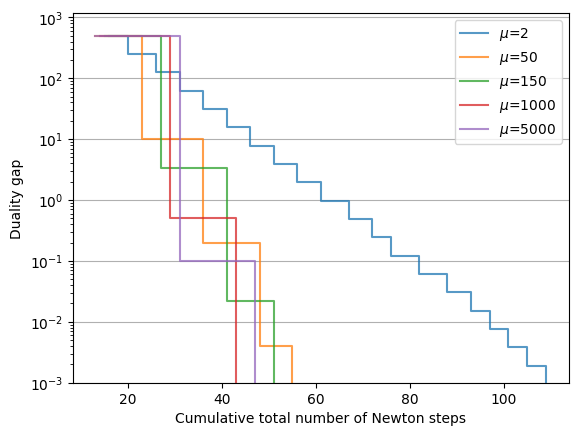

In [11]:

A, b, c = generate_instance(m, n)
mus = [2, 50, 150, 1000, 5000]


for mu in mus:
    history, x_star, nu_star, lam_star = lp_solver(A, b, c, mu=mu)
    plt.step(np.cumsum(history[0, :]), history[1, :], where="post", label=f"$\mu$={mu}", alpha=0.75)


plt.yscale("log")
plt.grid(axis="y")
plt.legend()
plt.xlabel("Cumulative total number of Newton steps")
plt.ylabel("Duality gap")
plt.ylim(1e-3)

plt.show()


### A16.10

In [12]:

n = 4
m = 2 

A = np.array([
[ 0.95,  0.16,  0.12,  0.01],
[-0.12,  0.98, -0.11, -0.03],
[-0.16,  0.02,  0.98,  0.03],
[-0.  ,  0.02, -0.04,  1.03],
])

B = np.array([
[ 0.8 , 0. ],
[ 0.1 , 0.2],
[ 0.  , 0.8],
[-0.2 , 0.1],
])

x_init = np.ones(n)

T = 100

In [13]:

x = cp.Variable((n, T+1))
u = cp.Variable((m, T))

constraints = [
    x[:, 0] == x_init, 
    x[:, T] == 0              
]

for t in range(T):
    constraints.append(x[:, t+1] == A @ x[:, t] + B @ u[:, t])

crits = ["sum of squares of 2-norms", "sum of 2-norms", "max of 2-norms", "sum of 1-norms"]
objective = None

def solve_prob(crit):
    if crit == "sum of squares of 2-norms":
        objective = cp.Minimize(cp.sum_squares(cp.norm2(u, axis=0)))
    elif crit == "sum of 2-norms":
        objective = cp.Minimize(cp.sum(cp.norm2(u, axis=0)))
    elif crit == "max of 2-norms":
        objective = cp.Minimize(cp.max(cp.norm2(u, axis=0)))
    else:
        objective = cp.Minimize(cp.sum(cp.norm1(u, axis=0)))

    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.ECOS)
    return [u, prob]

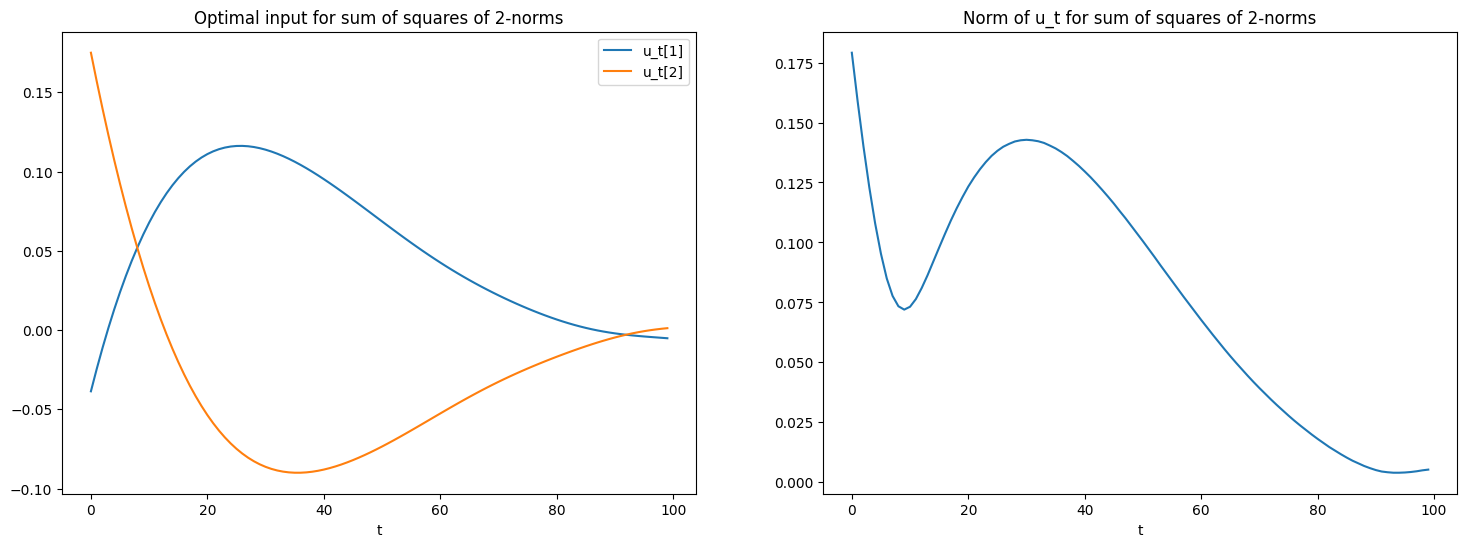

Optimal cost: 0.8594995394857863


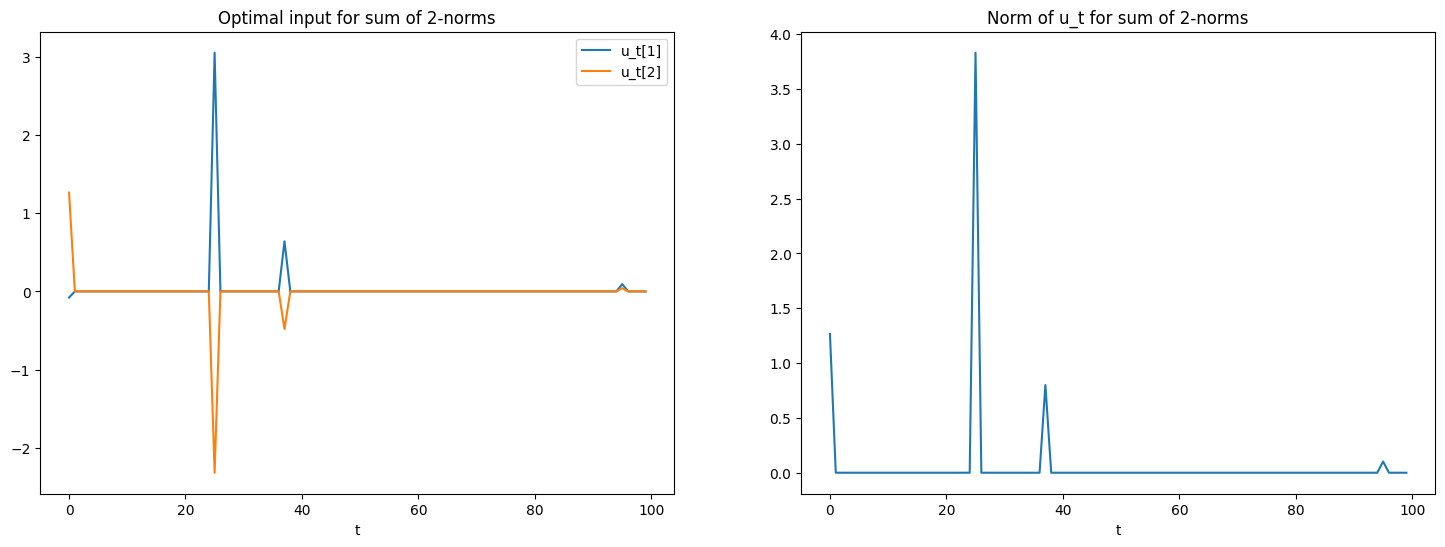

Optimal cost: 5.99685338546423


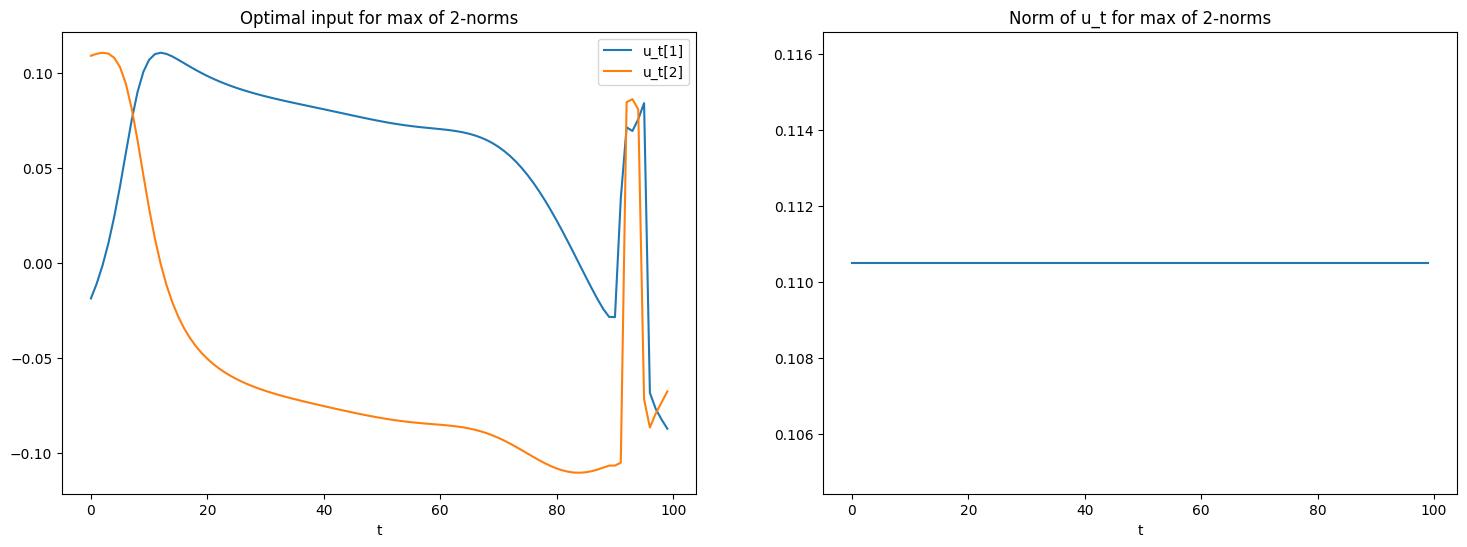

Optimal cost: 0.11047020864701963


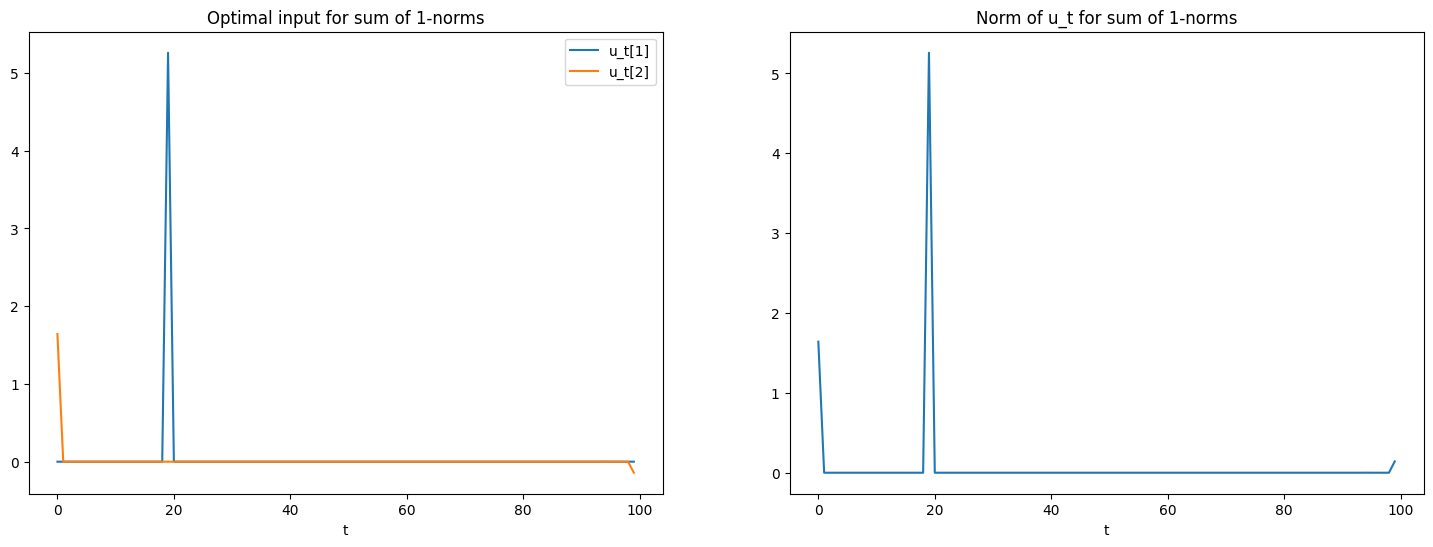

Optimal cost: 7.044288826037959


In [14]:
for crit in crits:
    u = solve_prob(crit)[0]
    prob = solve_prob(crit)[1]
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    for k in range(m):
        axs[0].plot(u.value[k, :], label=f"u_t[{k+1}]")

    axs[0].set(title=f"Optimal input for {crit}", xlabel="t")
    axs[0].legend()

    axs[1].plot(np.around(cp.norm2(u, axis=0).value, 4))
    axs[1].set(title=f"Norm of u_t for {crit}", xlabel="t")

    plt.show()


    print(f"Optimal cost: {prob.value}")


- square of squares of two norm: We note that for square of two norm, the vectors 𝑢_𝑡 all have rather small norms. We penalize strongly large norms because of the square, which explains why the magnitude of $\|u_t\|_2$ is small. Also, the square makes it that we don’t really penalize small inputs, which is why all of the 𝑢_𝑡 are nonzero.
- square of two norm: We do not penalize larger norms more, so so the optimal input is concentrated at the best times
- max of two norms: Since the chosen objective only penalizes the max of $\|u_t\|_2$, all other timesteps do not influence the objective so long as they are smaller in magnitude. This is why we have a result where the norm of $\|u_t\|_2$ is constant.

- sum of one norm: This is the same reasoning as for $\sum_{t=0} \|u_t\|_2$. This also goes with the intuition that $\|\cdot\|_1$ is a sparsifier.



### A21.24

In [15]:


Banks=[]
for i in range(0,16,1):
    for j in reversed(range(0,16,1)):
        Banks.append([i+0.5,j+0.5])
Cores=[[0,16],[8,16],[16,16],[0,8],[16,8],[0,0],[8,0],[16,0]]  
def Cost1(P1,P2):
    return np.linalg.norm(np.array(P1)-np.array(P2),ord=1)
def Cost2(P1,P2):
    return np.power(np.linalg.norm(np.array(P1)-np.array(P2),ord=1),3/2)
#----------------------------------------------------------------------
#Use problem the following problem data in your solution.
m=256#number of banks
n=8#number of cores
C=np.ones((n,m))
D=np.ones((n,m))
for i in range(n):
    for j in range(m):
        C[i,j]=Cost1(Cores[i],Banks[j])
        D[i,j]=0.01*Cost2(Cores[i],Banks[j])
c=32*np.ones((m,))#capacity of bank j
b=np.array([2048,1024,512,1024,1024,512,1024,512])#storage requirement of core i


In [16]:

M = cp.Variable((n, m))
objective = cp.sum(cp.multiply(C, M) + cp.multiply(D, cp.square(M)))

constraints = [
    M >= 0,
    cp.sum(M, axis=1) == b,          
    cp.sum(M, axis=0) <= c           
]

problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

M_opt = M.value


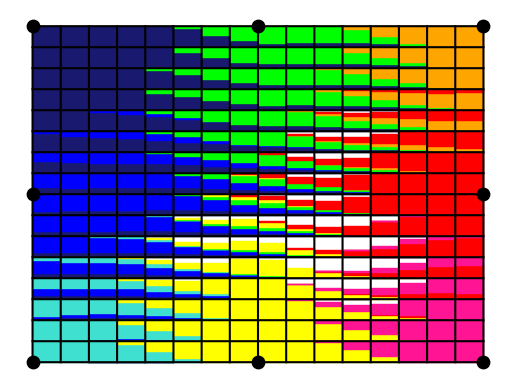

<Figure size 640x480 with 0 Axes>

In [17]:

# Plotting function
def plot_memory(M, save_file="allocating_memory_py.pdf"):
    Ratio = {}
    for j in range(m):
        Ratio[j] = []
        for i in range(n):
            Ratio[j].append(M[i, j] / 32)
    
    def y_line(index, x):
        return index * np.ones(len(x))

    def x_segment(index, xm):
        return xm[int(index * 100):int((index + 1) * 100)]

    x = np.linspace(0, 16, 1600)
    xmain = np.linspace(0, 16, 1600)

    for i in range(17):
        y = y_line(i, x)
        plt.plot(x, y, "k")
        plt.plot(y, x, "k")

    colormap = ["midnightblue", "blue", "turquoise", "lime", "yellow", "orange", "red", "deeppink"]
    for banka in Ratio:
        row_number = 15 - banka // 16
        column_number = banka % 16
        r = Ratio[banka]
        y_prev = (row_number) * np.ones((100,))
        sum_r_so_far = 0.0
        for i in range(n):
            if r[i] > 0.001:
                x = x_segment(column_number, xmain)
                y = (row_number + sum_r_so_far + r[i]) * np.ones((100,))
                plt.fill_between(x, y, y_prev, color=colormap[i])
                y_prev = y
                sum_r_so_far += r[i]

    plt.scatter([0, 8, 16, 0, 16, 0, 8, 16], [16, 16, 16, 8, 8, 0, 0, 0], s=80, c='k')
    plt.axis('off')
    plt.show()
    plt.savefig(save_file)

# Plot the optimal memory allocation
plot_memory(M_opt)

### A5.21-d

In [18]:
np.random.seed(10)
(m, n) = (30, 10)
A = np.random.rand(m, n)
b = np.random.rand(m, 1)
c_nom = np.ones((n, 1)) + np.random.rand(n, 1)

In [19]:

F = np.zeros((2*n + 2, n))
F[:n, :] = np.eye(n)
F[n:2*n, :] = -np.eye(n)
F[2*n, :] = np.ones((1, n))
F[2*n + 1, :] = -np.ones((1, n))
F = np.asmatrix(F)

g = np.zeros((2*n + 2, 1))
g[:n] = 1.25 * c_nom
g[n:2*n] = -0.75 * c_nom
g[2*n] = 1.1 * np.sum(c_nom)
g[2*n + 1] = -0.9 * np.sum(c_nom)
g = np.asmatrix(g)


In [20]:
# x optimal for the robust problem, worst case cost for robust x
var_lambda = cp.Variable((2*n+2, 1), nonneg=True)
x = cp.Variable((n, 1))
c = cp.Variable((n, 1))

objective = cp.Minimize(var_lambda.T @ g)
constraints = [
    F.T @ var_lambda - x == 0,
    A @ x >= b
]

prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.ECOS)
x_robust = x.value
worst_case_cost = prob.value

In [21]:
print(f"The worst case cost for the optimal solution x_robust to the robust problem is {worst_case_cost:.4f}.")
print(f"For that same x_robust, the nominal cost is {(c_nom.T @ x_robust).item():.4f}.")

The worst case cost for the optimal solution x_robust to the robust problem is 3.1660.
For that same x_robust, the nominal cost is 2.5232.


In [22]:

# x optimal for the nominal problem 
x = cp.Variable((n, 1))
constraints = [A @ x >= b]
objective = cp.Minimize(c_nom.T @ x)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.ECOS)
x_nom = x.value


In [23]:
# worst case cost of x_nom
constraints = [
    A @ x >= b,
    F @ c <= g
]
objective = cp.Maximize(c.T @ x_nom)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.ECOS)

print("*" * 100)
print(f"The worst case cost for the optimal solution x_nom to the nominal problem is {prob.value:.4f}.")
print(f"For that same x_nom, the nominal cost is {(c_nom.T @ x_nom).item():.4f}.")

****************************************************************************************************
The worst case cost for the optimal solution x_nom to the nominal problem is 7.2216.
For that same x_nom, the nominal cost is 2.1093.
